In [36]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [37]:
df=fetch_california_housing(as_frame=True)
df=pd.DataFrame(df.data)

In [38]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
X=df.iloc[:,0:8]
y=df.iloc[:,7]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
rt=DecisionTreeRegressor(criterion='squared_error',max_depth=5)

In [42]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [43]:
y_pred=rt.predict(X_test)

In [44]:
r2_score(y_test,y_pred)

0.9986908480396144

Hyperparameter tuning

In [45]:
param_grid = {
    'max_depth': [2, 4, 8, 10, None],
    'criterion': ['squared_error', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.25, 0.5, 1.0]
}


In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Remove the () after param_grid
reg = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_grid, n_iter=5, cv=5)



In [52]:
reg.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=5,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 4, 8, 10, None],
                                        'max_features': [0.25, 0.5, 1.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [53]:
reg.best_score_

np.float64(0.9999712459785683)

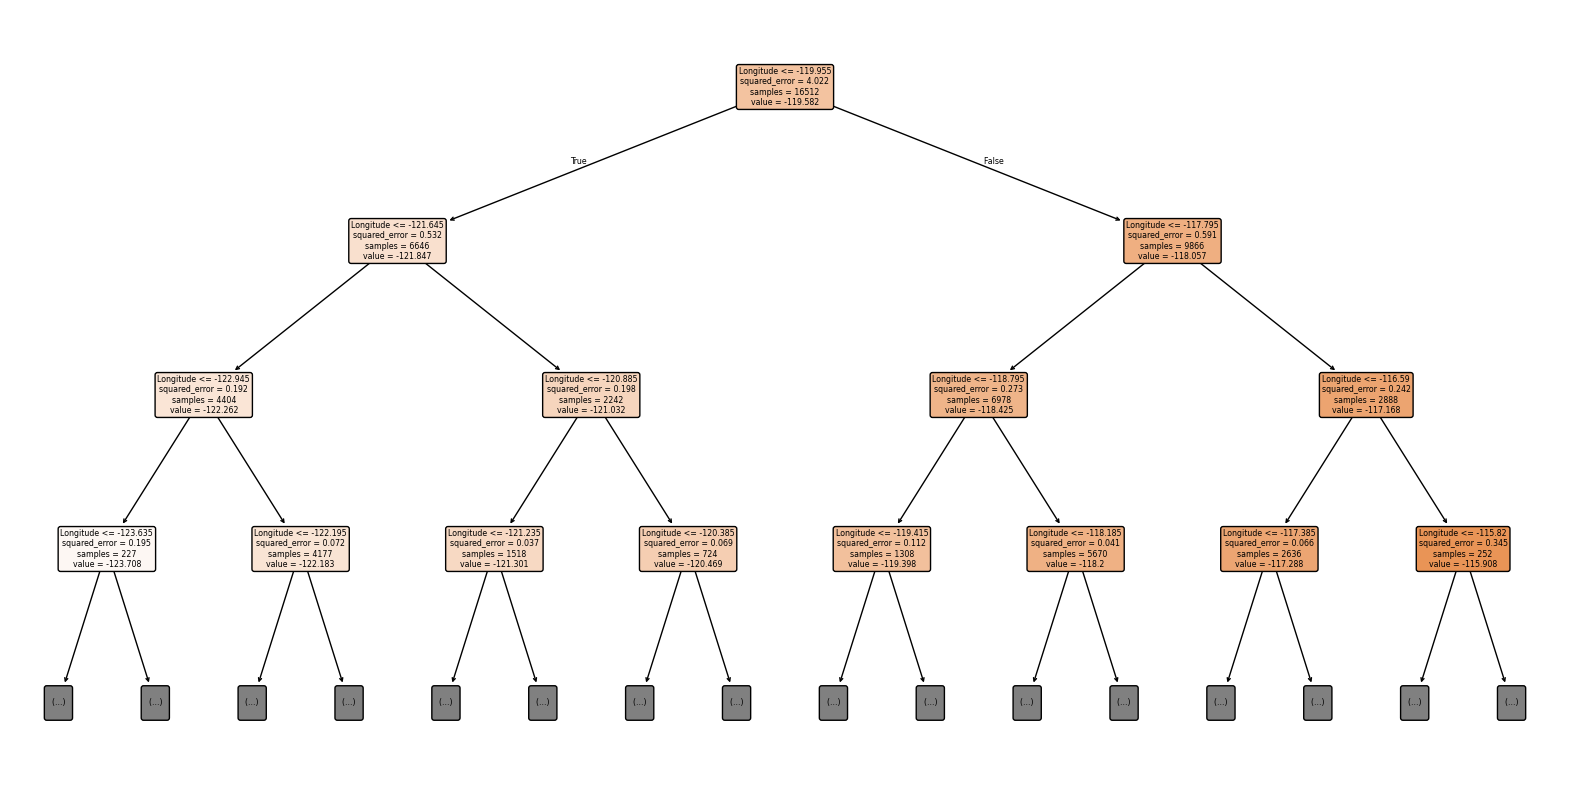

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. Extract the best tree
best_tree = reg.best_estimator_

# 2. Setup the figure size (trees can get very wide!)
plt.figure(figsize=(20, 10))

# 3. Plot the tree
plot_tree(best_tree, 
          feature_names=X_train.columns,  # Assumes X_train is a DataFrame
          filled=True,                    # Colors the nodes by value
          rounded=True,                   # Makes the boxes look cleaner
          max_depth=3)                    # Limits view so it's readable

plt.show()